In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
# extra code - the exact arguments of make_blobs() are not important
blob_centers=np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8],
                       [-2.8, 2.8], [-2.8, 1.3]])

blob_std=np.array([0.3, 0.3, 0.1, 0.1, 0.1])
X,y= make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)
k=5
kmeans=KMeans(n_clusters=k, random_state=42, n_init=20)
y_pred=kmeans.fit_predict(X)
y_pred[:5]

array([1, 4, 0, 4, 4], dtype=int32)

In [ ]:
X.shape

(2000, 2)

<ipython-input-3-80845bcfdbdd>:8: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', edgecolors='white')


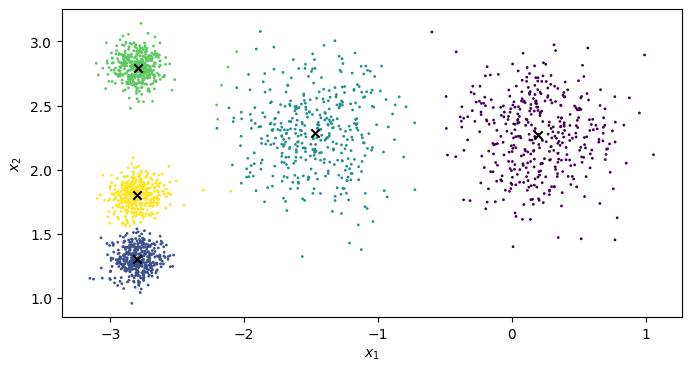

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
  plt.figure(figsize=(8,4))
  plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', edgecolors='white')

plot_clusters(X, y_pred)
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[ 0.19897131,  2.26931299],
       [-2.80037642,  1.30082566],
       [-1.47390895,  2.28362279],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

In [ ]:
kmeans.labels_

array([1, 4, 0, ..., 3, 0, 4], dtype=int32)

In [ ]:
import numpy as np

X_new=np.array([[0,2], [3,2], [-3,3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

In [ ]:
kmeans.transform(X_new)

array([[0.33484185, 2.88633901, 1.50094952, 2.9042344 , 2.81093633],
       [2.81394584, 5.84236351, 4.48289004, 5.84739223, 5.80730058],
       [3.28135962, 1.71086031, 1.68586779, 0.29040966, 1.21475352],
       [3.20727828, 1.21567622, 1.54135427, 0.36159148, 0.72581411]])

In [ ]:
good_init=np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans=KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

In [ ]:
kmeans.inertia_

160.621474224147

In [ ]:
kmeans.score(X)

-160.62147422414697

#Mini-Batch K-Means

In [ ]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans=MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [ ]:
minibatch_kmeans.inertia_

160.67686862668893

# Choosing the optimal number of cluster

In [ ]:
kmeans_per_k=[KMeans(n_clusters=k, random_state=42).fit(X)
              for k in range(1, 10)]
inertias=[model.inertia_ for model in kmeans_per_k]

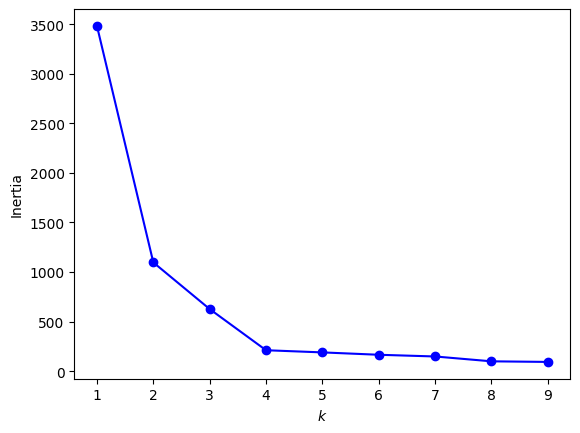

In [ ]:
plt.plot(range(1,10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores=[silhouette_score(X, model.labels_)
                   for model in kmeans_per_k[1:]]

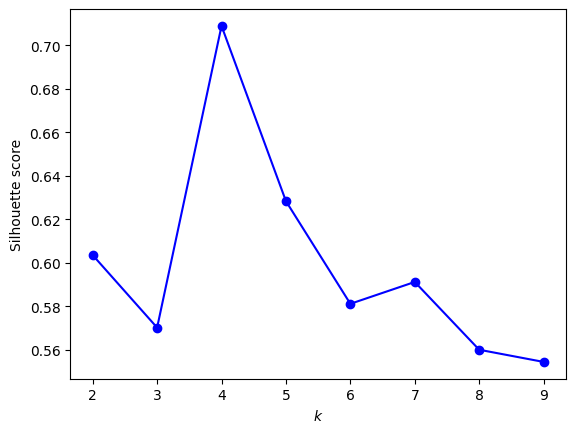

In [ ]:
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.show();

In [ ]:
#extra cide-downloads the ladybug image

import urllib.request
from pathlib import Path

IMAGES_PATH=Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath=IMAGES_PATH / filename
if not filepath.is_file():
  print("Downloading", filename)
  url=f"{homl3_root}/images/unsupervised_learning/{filename}"
  urllib.request.urlretrieve(url, filepath)

In [ ]:
import PIL

image=np.array(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

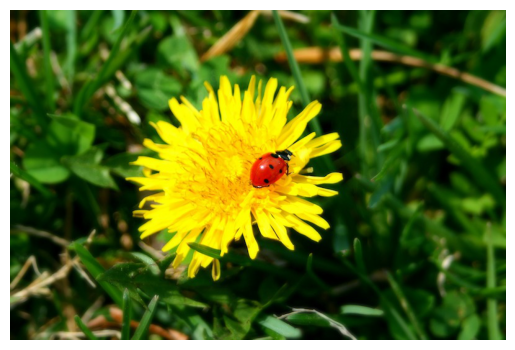

In [ ]:
plt.imshow(image)
plt.axis('off');

In [ ]:
X=image.reshape(-1,3)
kmeans=KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img=kmeans.cluster_centers_[kmeans.labels_]
segmented_img=segmented_img.reshape(image.shape)

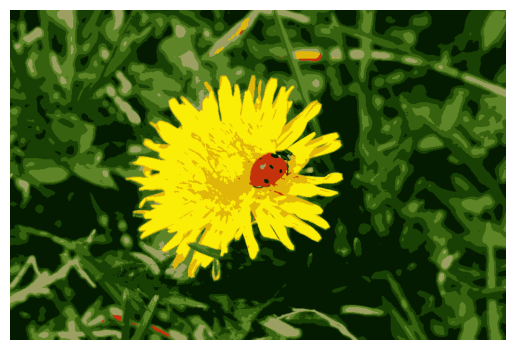

In [ ]:
plt.imshow(segmented_img/255)
plt.axis('off');

#Semi-Supervised learning

In [ ]:
from sklearn.datasets import load_digits
np.random.seed(42)
X_digits, y_digits=load_digits(return_X_y=True)
X_train, y_train=X_digits[:1400], y_digits[:1400]
X_test, y_test=X_digits[1400:], y_digits[1400:]

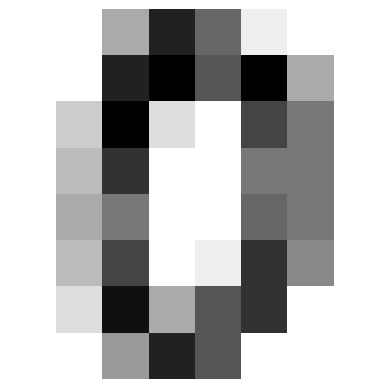

In [ ]:
plt.imshow(X_train[0].reshape(8,8), cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

n_labeled=50
log_reg=LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.7581863979848866

In [ ]:
log_reg_full=LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9093198992443325

In [ ]:
k=50
kmeans=KMeans(n_clusters=k, random_state=42, n_init=20)
X_digits_dist=kmeans.fit_transform(X_train)
representative_digit_idx=np.argmin(X_digits_dist, axis=0)
X_representative_digits=X_train[representative_digit_idx]

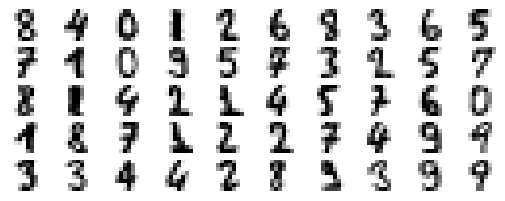

In [ ]:
for idx, image in enumerate(X_representative_digits):
  plt.subplot(k // 5, 10, idx+1)
  plt.imshow(image.reshape(8, 8), cmap="binary")
  plt.axis('off')

In [ ]:
y_representative_digits=np.array([
    8,4,0,1,2,6,8,3,6,5,
    7,1,0,9,5,7,3,2,5,7,
    8,1,4,2,1,4,5,7,6,0,
    1,8,7,1,2,2,7,4,9,9,
    3,3,4,4,2,8,9,3,9,9
])

In [ ]:
log_reg=LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8614609571788413

In [ ]:
y_train_propagated=np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i]=y_representative_digits[i]

In [ ]:
log_reg=LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8488664987405542

In [ ]:
(y_train_propagated==y_train).mean()

0.9478571428571428

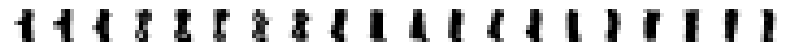

In [ ]:
plt.figure(figsize=(10,2))
for idx, image in enumerate(X_train[kmeans.labels_==3][:20]):
  plt.subplot(1, 20, idx+1)
  plt.imshow(image.reshape(8,8), cmap="binary")
  plt.axis('off')

In [ ]:
percentile_closest=99

X_cluster_dist=X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster=(kmeans.labels_==i)
  cluster_dist=X_cluster_dist[in_cluster]
  cutoff_distance=np.percentile(cluster_dist, percentile_closest)
  above_cutoff=(X_cluster_dist>cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff]=-1

partially_propagated=(X_cluster_dist!=-1)
X_train_partially_propagated=X_train[partially_propagated]
y_train_partially_propagated=y_train_propagated[partially_propagated]

In [ ]:
log_reg=LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8513853904282116

#DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan=DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
X_new=np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2,1]])
knn.predict(X_new)

array([6, 0, 3, 2])